
📊 CONFUSION MATRIX
╒══════════╤═══════════════╤═══════════════╕
│          │   Predicted 0 │   Predicted 1 │
╞══════════╪═══════════════╪═══════════════╡
│ Actual 0 │         45004 │           166 │
├──────────┼───────────────┼───────────────┤
│ Actual 1 │          5614 │           286 │
╘══════════╧═══════════════╧═══════════════╛

📋 CLASSIFICATION REPORT
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │        0.89 │     1    │       0.94 │  45170    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │        0.63 │     0.05 │       0.09 │   5900    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.89 │     0.89 │       0.89 │      0.89 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.76 │     0.

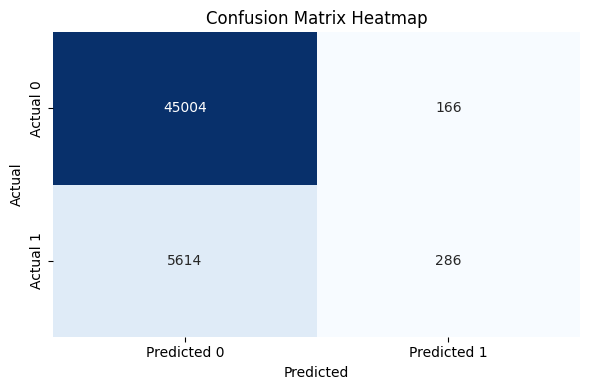

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tabulate import tabulate
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/1. Predict Loan Default.csv")

# Drop ID column
df.drop(columns=['LoanID'], inplace=True)

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix,
                       index=[f'Actual {i}' for i in model.classes_],
                       columns=[f'Predicted {i}' for i in model.classes_])

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 🎨 Color-coded titles
print("\n" + colored("📊 CONFUSION MATRIX", "cyan", attrs=["bold"]))
print(tabulate(conf_df, headers="keys", tablefmt="fancy_grid"))

print("\n" + colored("📋 CLASSIFICATION REPORT", "magenta", attrs=["bold"]))
print(tabulate(report_df, headers="keys", tablefmt="fancy_grid", showindex=True))

print("\n" + colored("✅ ACCURACY SCORE:", "green", attrs=["bold"]) + f" {colored(f'{accuracy:.2%}', 'yellow')}")

# Optional: Heatmap (Jupyter / GUI required)
try:
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix Heatmap")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()
except:
    pass
